# Kütüphanelerin ve Veri Setinin Yüklenmesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Veri Seti Hakkında Genel Bilgiler

**Bu veri seti, 50 farklı startup şirketinin çeşitli harcamalarını ve kârlılıklarını içermektedir.**

* **R&D Spend (Ar-Ge Harcaması):** Şirketin araştırma ve geliştirme (Ar-Ge) için harcadığı tutar.  
* **Administration (Yönetim Harcaması):** Şirketin yönetim giderleri için harcadığı tutar.  
* **Marketing Spend (Pazarlama Harcaması):** Şirketin pazarlama ve reklam faaliyetleri için harcadığı tutar. 
* **State (Eyalet):** Şirketin faaliyet gösterdiği eyalet (örneğin, New York, California, Florida).  
* **Profit (Kâr):** Şirketin elde ettiği toplam kâr.  

Bu veri seti, startup'ların çeşitli harcama kalemleri ile kârlılıkları arasındaki ilişkileri analiz   etmek için kullanılabilir. Örneğin, Ar-Ge veya pazarlama harcamalarının kârlılık üzerindeki etkisini   incelemek için uygun bir veri setidir.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Analiz ve Yorumlama

İlk bakışta veri setimizin oldukça temiz olduğunu görüyoruz. Toplamda 50 startup'a ait verimiz var ve hiçbir satırda eksik bilgi (null değer) bulunmuyor. Bu da demek oluyor ki, eksik verileri doldurmak gibi ek bir temizlik adımıyla uğraşmamıza gerek kalmayacak. Veri tipleri de (`float64`, `object`) beklentilerimize uygun. Artık doğrudan görevlere odaklanabiliriz.

# Görevler

1. R&D harcaması ile kâr arasındaki ilişkiyi scatter plot ile gösterin.
2. Yönetim harcaması ile kâr arasındaki ilişkiyi scatter plot ile gösterin.
3. Eyaletlere göre ortalama kârları bar chart ile karşılaştırın.
4. R&D, yönetim ve pazarlama harcamalarının dağılımını boxplot ile karşılaştırın

## 1.GÖREV : R&D Harcaması ve Kâr Arasındaki İlişki (Scatter Plot): 
Ar-Ge harcamaları ile kâr arasındaki ilişkiyi gösteren bir dağılım grafiği.

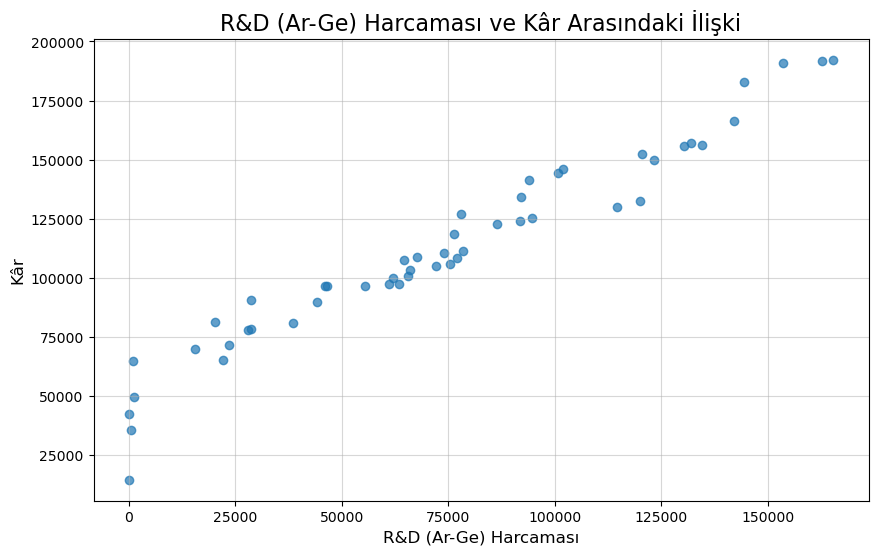

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(data['R&D Spend'], data['Profit'], alpha=0.7)
plt.title('R&D (Ar-Ge) Harcaması ve Kâr Arasındaki İlişki', fontsize=16)
plt.xlabel('R&D (Ar-Ge) Harcaması', fontsize=12)
plt.ylabel('Kâr', fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()

### Analiz ve Yorumlama

Grafiği incelediğimizde, Ar-Ge harcamaları ile kâr arasında çok net, pozitif bir ilişki olduğunu hemen fark ediyoruz. Noktaların soldan sağa doğru yükselen bir doğru etrafında toplanması, Ar-Ge'ye yapılan yatırım arttıkça kârın da belirgin bir şekilde arttığını gösteriyor. Bu durum, Ar-Ge faaliyetlerinin bir startup'ın kârlılığı için en önemli faktörlerden biri olabileceğine dair güçlü bir kanıt.

## 2.GÖREV: Yönetim Harcamaları ve Kâr Arasındaki İlişki (Scatter Plot): 
Yönetim harcamaları ile kâr arasındaki ilişkiyi gösteren bir dağılım grafiği.

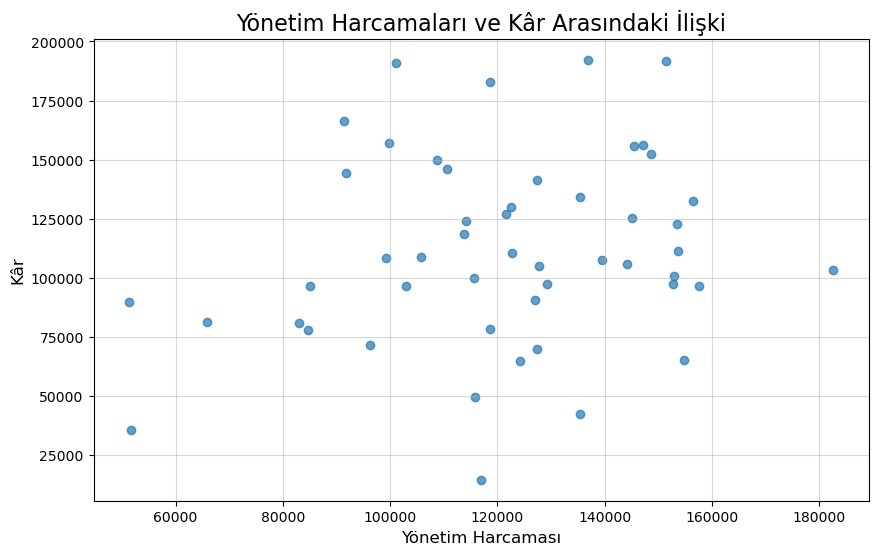

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Administration'], data['Profit'], alpha=0.7)
plt.title('Yönetim Harcamaları ve Kâr Arasındaki İlişki', fontsize=16)
plt.xlabel('Yönetim Harcaması', fontsize=12)
plt.ylabel('Kâr', fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()

### Analiz ve Yorumlama

Ar-Ge grafiğinin tam tersi bir tabloyla karşılaşıyoruz. Yönetim harcamaları ile kâr arasında herhangi bir belirgin ilişki kurmak oldukça zor. Grafikteki noktalar tamamen dağınık bir yapıda. Yani bir şirketin yönetim için çok ya da az harcama yapması, kârlılığı hakkında bize doğrudan bir ipucu vermiyor. Bu da yönetim giderlerinin kârı tahmin etmede zayıf bir gösterge olduğunu düşündürüyor.

## 3. GÖREV: Eyaletlere Göre Ortalama Kâr (Bar Chart): 
Farklı eyaletlerdeki startup'ların ortalama kârlarını karşılaştıran bir çubuk grafik.

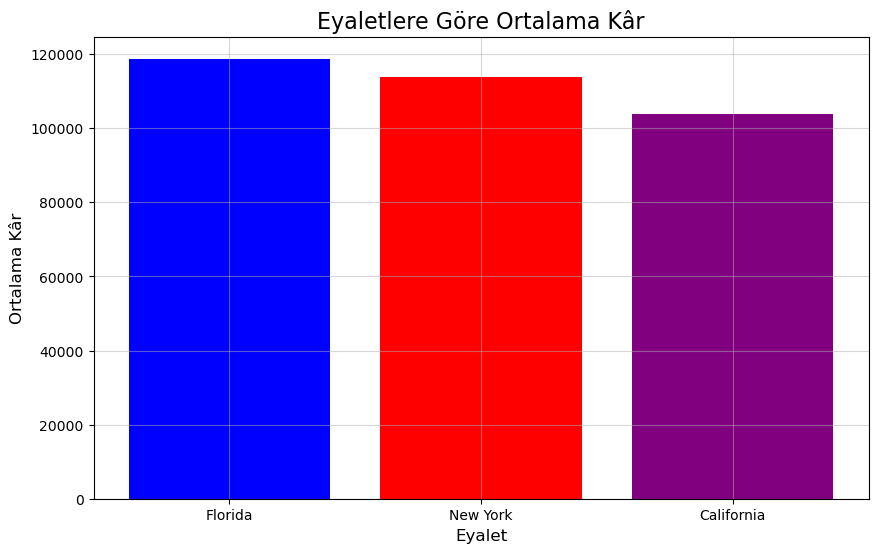


Eyalet			Ortalama Kâr
-----------------------------------
Florida   		118,774.02
New York  		113,756.45
California		103,905.18


In [5]:
plt.figure(figsize=(10, 6))

ort_kar = data.groupby('State')['Profit'].mean().sort_values(ascending=False)

plt.bar(ort_kar.index, ort_kar.values, color=['blue', 'red', 'purple'])
plt.title('Eyaletlere Göre Ortalama Kâr', fontsize=16)
plt.xlabel('Eyalet', fontsize=12)
plt.ylabel('Ortalama Kâr', fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()

print("\nEyalet\t\t\tOrtalama Kâr")
print("-" * 35)

for state, profit in ort_kar.items():
    print(f"{state:<10}\t\t{profit:,.2f}")

### Analiz ve Yorumlama

Eyalet bazında ortalama kârlara baktığımızda, Florida'daki startup'ların bir miktar daha kârlı olduğunu görüyoruz. Onu New York ve California takip ediyor. Ancak dikkat çeken asıl nokta bu üç eyalet arasındaki kâr farklarının çok da büyük olmaması. Bu da bize bir startup'ın başarısında bulunduğu eyaletten ziyade, Ar-Ge gibi diğer operasyonel faktörlerin daha ağır bastığını gösteriyor olabilir.

## 4. GÖREV: Harcama Türlerinin Karşılaştırması (Boxplot): 
R&D, yönetim ve pazarlama harcamalarının dağılımını karşılaştıran bir kutu grafiği.

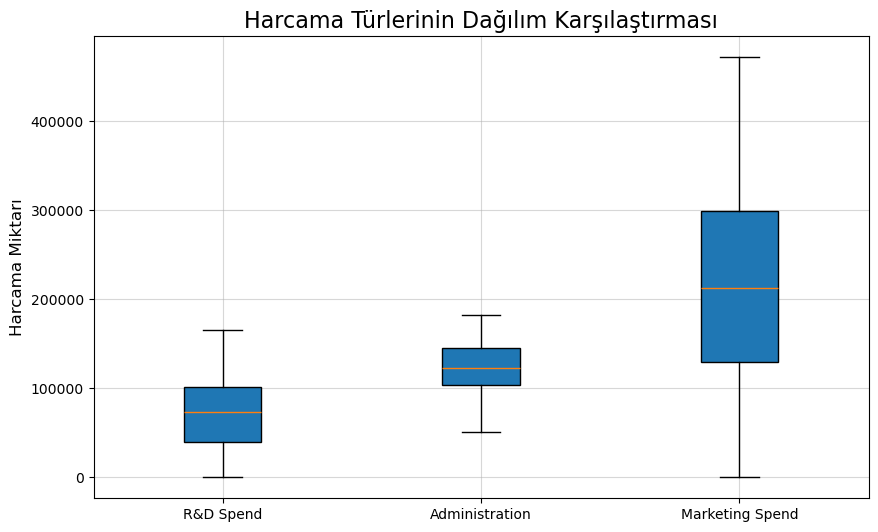




 --- Harcama Türlerine Göre İstatistiksel Özet --- 



,Ortalama Değer,Orta Değer (Medyan),Dağılım (Std. Sapma)
R&D Harcaması,"73,721.62","73,051.08","45,902.26"
Yönetim Harcaması,"121,344.64","122,699.79","28,017.80"
Marketing Harcaması,"211,025.10","212,716.24","122,290.31"


In [6]:
harcama_veri = data[['R&D Spend', 'Administration', 'Marketing Spend']]

plt.figure(figsize=(10, 6))
# plt.boxplot'ın etiketleri otomatik almadığı için xticks ile manuel ekliyoruz.
plt.boxplot(harcama_veri.values, patch_artist=True)
plt.xticks([1, 2, 3], ['R&D Spend', 'Administration', 'Marketing Spend'])
plt.title('Harcama Türlerinin Dağılım Karşılaştırması', fontsize=16)
plt.ylabel('Harcama Miktarı', fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()

harcama_ozeti = harcama_veri.describe()
tablo_verisi = harcama_ozeti.loc[['mean', '50%', 'std']].T
tablo_verisi.columns = ['Ortalama Değer', 'Orta Değer (Medyan)', 'Dağılım (Std. Sapma)']
tablo_verisi.index = ['R&D Harcaması', 'Yönetim Harcaması', 'Marketing Harcaması']
formatted_table = tablo_verisi.style.format("{:,.2f}")

print("\n\n\n --- Harcama Türlerine Göre İstatistiksel Özet --- \n")
formatted_table

### Analiz ve Yorumlama

Üç farklı harcama kalemini bir arada görmek için kutu grafiği (boxplot) harika bir yöntem. Bu grafik ve altındaki özet tablo bize birkaç önemli şeyi aynı anda anlatıyor:

* **Değişkenlik:** Yönetim (Administration) harcamalarının ne kadar dar bir aralıkta toplandığına dikkat edin. Standart sapmasının **28,017.80** ile en düşük olması, şirketlerin genellikle benzer miktarlarda yönetim gideri olduğunu gösterir. Ancak Ar-Ge ve özellikle Pazarlama harcamaları çok daha geniş bir alana yayılmış. Pazarlamanın standart sapmasının **122,290.31** gibi devasa bir rakam olması, bu alandaki bütçelerin şirketten şirkete ne kadar değiştiğinin bir göstergesi.

* **Merkezi Eğilim:** Genel olarak şirketlerin en çok pazarlamaya (ortalama **211,025.10**), ardından Ar-Ge'ye (ortalama **73,721.62**) bütçe ayırdığını, ortalama değerlerden anlayabiliriz. Yönetim harcamaları ise bu ikisine göre daha düşük bir seviyede kalıyor.